In [1]:
import pandas as pd
import re
import plotly.express as px
import openpyxl

In [2]:
from bs4 import BeautifulSoup

with open('the2017report.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')

In [3]:
nums = len(soup.prettify().split('#231F20;">'))
nums

56

In [4]:
soup.prettify().split('#231F20;">')[nums-1][:15]

'\n    SWEDEN\n   '

In [5]:
# soup.prettify().split('#231F20;">')[0]

In [6]:
sn = []
for i in range(1,nums):
    state_text = soup.prettify().split('#231F20;">')[i][:15]
    sta = state_text
    num = len(soup.prettify().split('#231F20;">')[i].split('<p class="s1'))-1
    sn.append([sta, num])

In [7]:
state_num = pd.DataFrame(sn)
# df_state.columns = df_state.iloc[0]
# df_state = df_state[1:]
# df_state

In [42]:
state_num = state_num.rename(columns={0: 'state', 1: 'num'})
state_num['state'] = [x.replace('\n','').replace('<','').replace('/','').strip() for x in state_num.state.tolist()]

In [9]:
# state_num

In [90]:
len(state_num['state'])-8

47

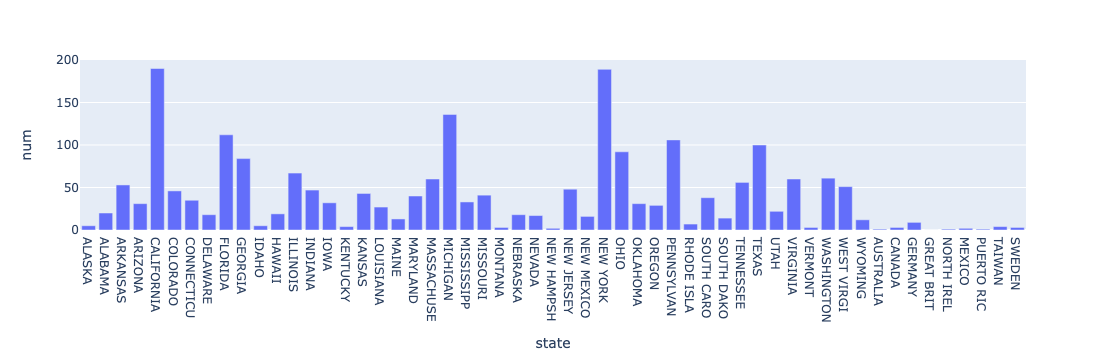

In [43]:
fig = px.bar(state_num, x='state', y='num')
fig.show()

**functions**

In [13]:
def extract_all_content_between_newlines(text):
    contents = []
    start_index = 0

    while True:
        start_index = text.find('\n', start_index)
        if start_index == -1:
            break

        end_index = text.find('\n', start_index + 1)
        if end_index == -1:
            break

        content_between_newlines = text[start_index + 1:end_index].strip()
        if content_between_newlines:
            contents.append(content_between_newlines)
        
        start_index = end_index  # Set the start_index as the end_index

    combined_contents = " ".join(contents)

    return combined_contents

In [14]:
def process_data(data):
    def extract_email_url_and_name(text):
        url_pattern = r'href="(.*?)"'
        name_pattern = r'<span.*?>(.*?)<\/span>'
        
        url_matches = re.findall(url_pattern, text)
        name_match = re.search(name_pattern, text)
        
        urls = url_matches if url_matches else []
        name = name_match.group(1).strip() if name_match else ''
        
        return urls, name
    
    urls, name = extract_email_url_and_name(data)
    
    return urls, name

In [15]:
def flatten_list(lst):
    result = []
    for item in lst:
        if isinstance(item, (list, tuple)):
            result.extend(flatten_list(item))
        else:
            result.append(item)
    return result

In [16]:
def remove_closing_angle_brackets(text):
    cleaned_text = re.sub(r'</[^>]+>|<br/>|<[^>]+>|</span>|</h2>', '', text)
    return cleaned_text

**test on FL & CA**

In [11]:
print([soup.prettify().split('#231F20;">')[5][:15], len(soup.prettify().split('#231F20;">')[5].split('<p class="s1'))-1])
print([soup.prettify().split('#231F20;">')[9][:15], len(soup.prettify().split('#231F20;">')[9].split('<p class="s1'))-1])

['\n    CALIFORNIA', 190]
['\n    FLORIDA\n  ', 112]


In [60]:
data_test = []

for i in [5,9]:
    statelen_test = len(soup.prettify().split('#231F20;">')[i].split('<p class="s1'))-1
    res_test = []
    for j in range(statelen_test):
        cl = soup.prettify().split('#231F20;">')[i].split('<p class="s1')[j].split('</p>\n')
        row = [extract_all_content_between_newlines(c) for c in cl]
        processed_values = [process_data(value) if value.startswith('<a') else value for value in row]
        flattened_list = flatten_list(processed_values)
        row_c1 = [remove_closing_angle_brackets(c1) for c1 in flattened_list]
        res_test.append(row_c1)
    data_test.append(res_test)

In [66]:
print([len(data_test[0]),len(data_test[1])])

[190, 112]


In [85]:
workbook_test = openpyxl.Workbook()

sheet_names = ['CALIFORNIA', 'FLORIDA']
for i, sheet_name in enumerate(sheet_names):
    sheet = workbook_test.create_sheet(sheet_name, index=i)
    
    for row in data_test[i]:
        sheet.append(row)

In [86]:
workbook_test.save('output_test.xlsx')

**loop**

In [116]:
data = []

for i in range(1,47):
    print(i)
    statelen = len(soup.prettify().split('#231F20;">')[i].split('<p class="s1'))-1
    res = []
    for j in range(statelen):
        cl = soup.prettify().split('#231F20;">')[i].split('<p class="s1')[j].split('</p>\n')
        row = [extract_all_content_between_newlines(c) for c in cl]
        processed_values = [process_data(value) if value.startswith('<a') else value for value in row]
        flattened_list = flatten_list(processed_values)
        row_c1 = [remove_closing_angle_brackets(c1) for c1 in flattened_list]
        res.append(row_c1)
    data.append(res)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [119]:
workbook = openpyxl.Workbook()

sheet_names = state_num.state.tolist()[0:46]

for k, sheet_name in enumerate(sheet_names):
    sheet = workbook.create_sheet(sheet_name, index=k)
    
    for row in data[k]:
        sheet.append(row)

In [120]:
workbook.save('output.xlsx')